In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

https://github.com/dbrvs/AMP-timing


In [35]:
df = pd.read_csv('RV217Clean.csv') 
df

,ID,draw_date,days,VL,log10VL,VLunit,posVL,primary_kinetics,CD4,CD8,...,VL_site,FiebigStage,priority,site,Notes,visit_code,EIA,WB,arv_note,any_arv
0,10066,4-Feb-10,-589.0,NaN,NaN,copies/mL,False,False,NaN,NaN,...,NaN,NaN,Priority 1,Uganda,NaN,A,NR,NaN,NaN,False
1,10066,18-Feb-10,-575.0,NaN,NaN,copies/mL,False,False,NaN,NaN,...,NaN,NaN,Priority 1,Uganda,NaN,B,NR,NaN,NaN,False
2,10066,22-Jul-10,-421.0,NaN,NaN,copies/mL,False,False,NaN,NaN,...,NaN,NaN,Priority 1,Uganda,NaN,D,NR,NaN,NaN,False
3,10066,6-Jan-11,-253.0,NaN,NaN,copies/mL,False,False,NaN,NaN,...,NaN,NaN,Priority 1,Uganda,NaN,F,NR,NaN,NaN,False
4,10066,23-Jun-11,-85.0,NaN,NaN,copies/mL,False,False,NaN,NaN,...,NaN,NaN,Priority 1,Uganda,NaN,H,NR,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,41146,27-Feb-17,0.0,65476.0,NaN,copies/mL,True,True,641.19,888.06,...,NaN,V-VI,Priority 4,NaN,NaN,1,R,R,NaN,True
1482,41146,10-Mar-17,11.0,NaN,NaN,copies/mL,False,True,1010.37,1494.53,...,NaN,NaN,Priority 4,NaN,NaN,4,NaN,NaN,NaN,True
1483,41146,24-Mar-17,25.0,NaN,NaN,copies/mL,False,True,872.33,1660.31,...,NaN,NaN,Priority 4,NaN,NaN,11,NaN,NaN,NaN,True
1484,41146,3-May-17,65.0,NaN,NaN,copies/mL,False,True,993.16,1629.42,...,NaN,NaN,Priority 4,NaN,NaN,13,NaN,NaN,NaN,True


In [36]:
df = df[['ID','days', 'log10VL']].dropna()
df

,ID,days,log10VL
7,10066,0.0,4.76
8,10066,3.0,5.83
9,10066,7.0,6.26
10,10066,10.0,7.51
11,10066,14.0,6.76
...,...,...,...
1458,40737,333.0,4.89
1459,40737,420.0,4.75
1461,40737,628.0,1.50
1463,40737,826.0,1.50


In [42]:
df = df.loc[df['days'] < 81]

In [43]:
patients = df.ID.unique()
patients

array([10066, 10203, 10220, 10428, 10435, 10463, 10723, 10739, 10742,
       40007, 40061, 40094, 40100, 40123, 40168, 40231, 40250, 40257,
       40265, 40353, 40363, 40511, 40512, 40577, 10753, 40032, 40211,
       40503, 40646, 10204, 10374, 10502, 40067, 40096, 40134, 40139,
       40242, 40283, 40195, 40435, 40492, 40528, 40640, 40652, 40700,
       40814, 41002, 40436, 40491, 40737, 40320])

In [44]:
len(patients)

51

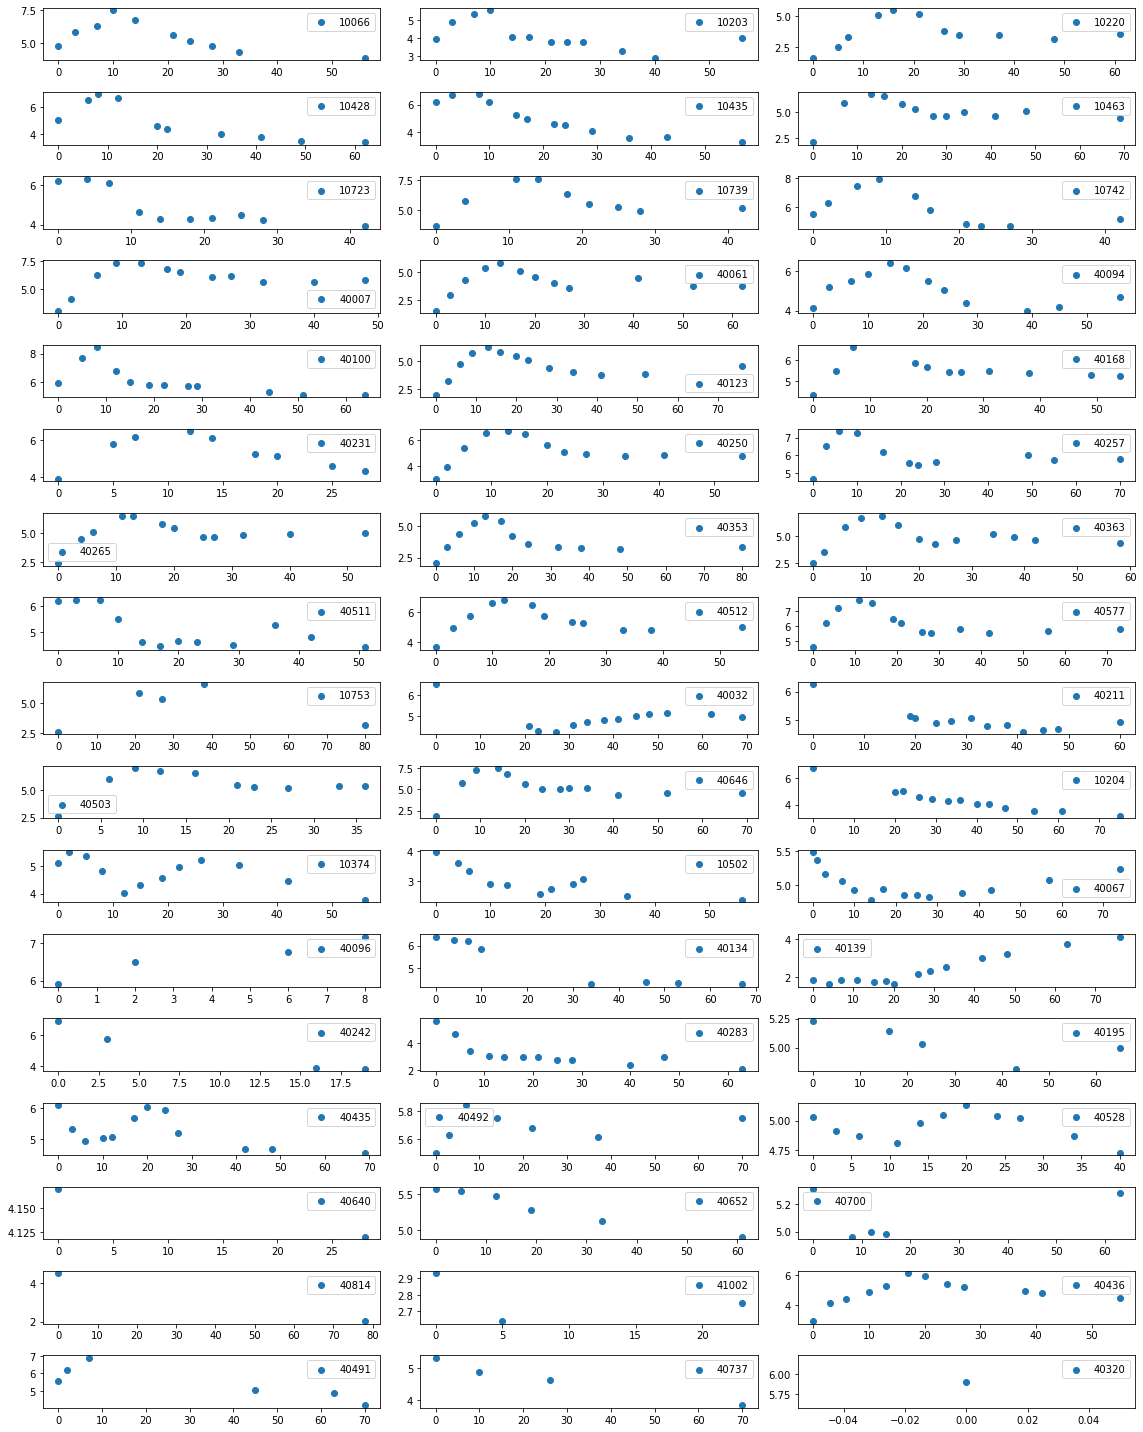

In [49]:
n = len(patients)
nrows = (n%3+n)//3

fig, axs = plt.subplots(ncols=3,nrows=nrows,figsize=(16,20),tight_layout=True)

for k in range(n):
    ftr = patients[k]    
    
    i = k // 3
    j = k% 3
    
    subdf = df.groupby(['ID']).get_group(ftr)
    x = list(subdf.days)
    axs[i][j].scatter(x,subdf['log10VL'],label=ftr)
    axs[i][j].legend(loc='best')
#     sns.histplot(data=xt, kde=True,ax=axs[i][j])
#     axs[i][j].set_title(ftr)
#     df_train[ftr] = xt   
    
# fig.suptitle("Train Data Graph")
# plt.legend()
plt.show()